<a href="https://colab.research.google.com/github/ddodds42/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/DAVID_DODDS_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pwd

'/content'

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import os
import datetime
import pandas as pd

In [0]:
from tensorflow.keras.datasets import boston_housing

In [4]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [6]:
type(boston_housing)

module

In [0]:
# import pandas as pd
# bwostin = pd.DataFrame(data=boston_housing)

# bwostin.head()

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [10]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
print(X_train_std[:10])

[[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  -0.25683275  0.62864202 -1.82968811
   1.11048828 -1.18743907  1.67588577  1.5652875   0.78447637  0.22061726
  -1.30850006]
 [-0.40149354 -0.48361547 -0.86940196 -0.25683275 -0.3615597  -0.3245576
  -1.23667187  1.10717989 -0.51114231 -1.094663    0.78447637  0.44807713
  -0.65292624]
 [-0.0056343  -0.48361547  1.0283258  -0.25683275  1.32861221  0.15364225
   0.69480801 -0.57857203  1.67588577  1.5652875   0.78447637  0.3898823
   0.26349695]
 [-0.37502238 -0.48361547 -0.54747912 -0.25683275 -0.54935658 -0.78865126
   0.18954148  0.48371503 -0.51114231 -0.71552978  0.51145832  0.38669063
  -0.13812828]
 [ 0.58963463 -0.48361547

In [0]:
inputs = X_train_std.shape[1]
epix = 100
batch_sizzle = 10

In [0]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(inputs,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [14]:
raise Exception('skip this cell!')

Exception: ignored

In [0]:
results = model.fit(
    X_train_std, y_train, validation_data = (X_test_std, y_test),
    epochs = epix, batch_size = batch_sizzle, callbacks = [tensorboard_callback]
)

In [0]:
%tensorboard --logdir logs

In [0]:
# epoch 99

In [0]:
import matplotlib.pyplot as plt

epix0 = range(len(results.history['mse']))

plt.plot(epix0, results.history['mse'], label='Train')
plt.plot(epix0, results.history['val_mse'], label='Test')

plt.title('Epoch accuracy')
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy')
plt.legend()
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
lin_mod = LinearRegression()

In [0]:
lin_mod.fit(X_train_std, y_train)

In [0]:
y_pred = lin_mod.predict(X_test_std)

In [0]:
mean_squared_error(y_pred, y_test)

# The neural net with 1 hidden layer beat a linear regression by almost 10 MSE points.

# Linear Model MSE = 23.1956

# Neural Net MSE = 13.2054

In [0]:
print(X_train_std[:2])

In [0]:
X_train

In [0]:
def recolumn(array):
  cols = [
             'crime', 'zoning', 'industry', 'river', 'nox', 'rooms', 'age',
             'commute', 'highways', 'tax', 'teachers', 'racist', 'classist'
             ]
  return pd.DataFrame(array, columns = cols)

In [0]:
X_train_frame = recolumn(X_train)
X_train_frame.head()

In [0]:
X_test_frame = recolumn(X_test)
X_test_frame.head()

In [0]:
def MLK(racist_dataframe):
  return racist_dataframe.drop(columns = ['racist', 'classist'])

In [0]:
X_train_mlk = MLK(X_train_frame)
X_train_mlk.head()

In [0]:
X_test_mlk = MLK(X_test_frame)
X_test_mlk.head()

In [0]:
X_train_mlk_std = scaler.fit_transform(X_train_mlk)
X_test_mlk_std = scaler.transform(X_test_mlk)
print(X_test_mlk_std[:2])

In [0]:
inputs0 = X_train_mlk_std.shape[1]

In [0]:
model0 = Sequential()
model0.add(Dense(64,activation='relu',input_shape=(inputs0,)))
model0.add(Dense(64,activation='relu'))
model0.add(Dense(1))

model0.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

results0 = model0.fit(
    X_train_mlk_std, y_train, validation_data = (X_test_mlk_std, y_test),
    epochs = epix, batch_size = batch_sizzle, callbacks = [tensorboard_callback]
)

In [0]:
%tensorboard --logdir logs

In [0]:
import matplotlib.pyplot as plt

epix1 = range(len(results0.history['mse']))

plt.plot(epix1, results0.history['mse'], label='Train')
plt.plot(epix1, results0.history['val_mse'], label='Test')

plt.title('Race neutral NN Epoch error')
plt.xlabel('Epochs')
plt.ylabel('Classification error')
plt.legend()
plt.show()

# The neural net isn't worse without the racist feature because the algorithm is racist, it's worst because Bostonians in the 1970's were racist.

# Original Racist Neural Net MSE = 13.2054

# Race - neutral Neural Net MSE = 21.83

In [0]:
lin_mod0 = LinearRegression()
lin_mod0.fit(X_train_mlk_std, y_train)
y_pred0 = lin_mod0.predict(X_test_mlk_std)
mean_squared_error(y_pred0, y_test)

# Original Racist Linear Model MSE = 23.1956

#Race - neutral Linear Model MSE = 24.6808

# It looks like the Neural Network's error suffered more from the removal of the racist feature, which is because it is better at dectecting racism in 1970's Bostonians. It can smell it...

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- [x] The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- [x] Normalize the data (all features should have roughly the same scale)
- [x] Import the type of model and layers that you will need from Keras.
- [x] Instantiate a model object and use `model.add()` to add layers to your model
- [x] Since this is a regression model you will have a single output node in the final layer.
- [x] Use activation functions that are appropriate for this task
- [x] Compile your model
- [x] Fit your model and report its accuracy in terms of Mean Squared Error
- [x] Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- [x] Run this same data through a linear regression model. Which achieves higher accuracy?
- [x] Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- [x] After feature engineering, which model sees a greater accuracy boost due to the new features?

In [15]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
raise Exception('skip this cell!')

Exception: ignored

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=16)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, input_dim=784, activation="relu"),
    Dense(10, activation="softmax"),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=100, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback, stop])

In [0]:
from tensorflow.keras.layers import Dropout

# stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=16)

model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, input_dim=784, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax"),
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.fit(x=X_train, 
        y=y_train, 
        epochs=100, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback, stop])

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from tensorflow.keras.optimizers import Adam, SGD, Nadam, Adadelta

np.random.seed(8)

def create_model(learning_rate=0.01, optimizer=Adam()):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(1024, input_dim=784, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  optim = optimizer(learning_rate=learning_rate)
  model.compile(optimizer=optim, loss='binary_crossentropy', metrics='accuracy')
  return model

model4 = KerasClassifier(build_fn=create_model, verbose=0)

# para_grid = {
#     'batch_size': [8, 64], 'epochs': [20],
#     'learning_rate': [0.001, 1],
#     'optimizer': [Adam, SGD, Nadam, Adadelta],
#     }

para_grid = {
    'batch_size': [8, 16, 32, 64], 'epochs': [20],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'optimizer': [Adam, SGD, Nadam, Adadelta],
    }

grid = RandomizedSearchCV(estimator=model4, param_distributions=para_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8244333386421203 using {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.01, 'epochs': 20, 'batch_size': 16}
Means: 0.5997166574001312, Stdev: 0.10755102619830086 with: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 8}
Means: 0.09918333292007446, Stdev: 0.0020584528021899418 with: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.1, 'epochs': 20, 'batch_size': 64}
Means: 0.09925000071525573, Stdev: 0.0004377992560275746 with: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>, 'learning_rate': 0.1, 'epochs': 20, 'batch_size': 16}
Means: 0.10066666752099991, Stdev: 0.001892969742483469 with: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 1, 'epochs': 20, 'batch_size': 8}
Means: 0.10046666711568833, Stdev: 0.00045521881708829206 with

# 82.44% accuracy. Wee dowggies.

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=16)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, input_dim=784, activation="relu"),
    Dense(10, activation="softmax"),
])

optim = Adadelta(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

result = model.fit(x=X_train, 
        y=y_train, 
        epochs=100,
        batch_size=16,
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback, stop])

Epoch 1/100
3750/3750 [==============================] - 10s 3ms/step - loss: 10.0839 - accuracy: 0.7135 - val_loss: 6.4519 - val_accuracy: 0.7706
Epoch 2/100
3750/3750 [==============================] - 10s 3ms/step - loss: 5.2074 - accuracy: 0.7956 - val_loss: 5.2569 - val_accuracy: 0.7908
Epoch 3/100
3750/3750 [==============================] - 10s 3ms/step - loss: 4.1509 - accuracy: 0.8116 - val_loss: 4.5716 - val_accuracy: 0.8002
Epoch 4/100
3750/3750 [==============================] - 10s 3ms/step - loss: 3.5555 - accuracy: 0.8234 - val_loss: 4.0078 - val_accuracy: 0.8142
Epoch 5/100
3750/3750 [==============================] - 10s 3ms/step - loss: 3.1095 - accuracy: 0.8325 - val_loss: 3.8973 - val_accuracy: 0.8167
Epoch 6/100
3750/3750 [==============================] - 10s 3ms/step - loss: 2.8048 - accuracy: 0.8392 - val_loss: 3.5493 - val_accuracy: 0.8201
Epoch 7/100
3750/3750 [==============================] - 10s 3ms/step - loss: 2.5775 - accuracy: 0.8431 - val_loss: 3.5007 

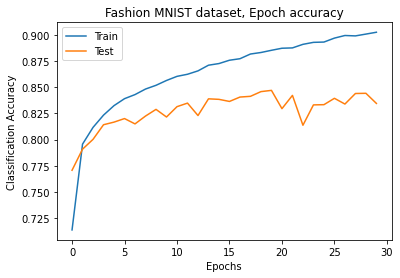

In [26]:
import matplotlib.pyplot as plt

epix2 = range(len(result.history['accuracy']))

plt.plot(epix2, result.history['accuracy'], label='Train')
plt.plot(epix2, result.history['val_accuracy'], label='Test')

plt.title('Fashion MNIST dataset, Epoch accuracy')
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy')
plt.legend()
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- [x] Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- [x] Make sure to one-hot encode your category labels
- [x] The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- [x] Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- [x] Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- [x] Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.